In [542]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

In [543]:
df_airline=pd.read_csv('AirPassengers.csv')
df_airline.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Exploratory Data Anlysis

## 1 - Check Variable Types and Null Values

In [544]:
df_airline.shape

(144, 2)

In [545]:
df_airline.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [546]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


## 2 . Convert the Month column to datetime format & Index it

In [547]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [548]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [549]:
df_airline.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [550]:
df_airline.set_index('Month',inplace=True)

In [551]:
df_airline.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


## 3 . Plot the graph to know the trend

<AxesSubplot:xlabel='Month'>

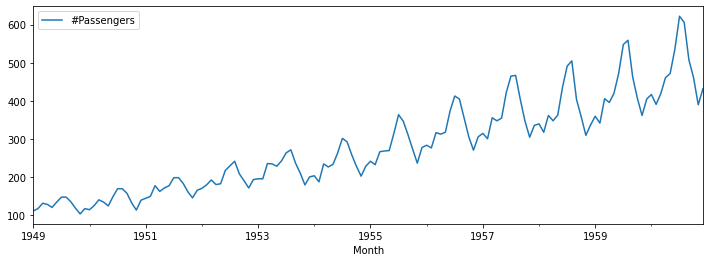

In [552]:
df_airline.plot(figsize=(12,4))

## 4 . Impute Missing Datapoints

In [553]:
data = df_airline.copy()

### a ) Mean Value Imputation

<AxesSubplot:xlabel='Month'>

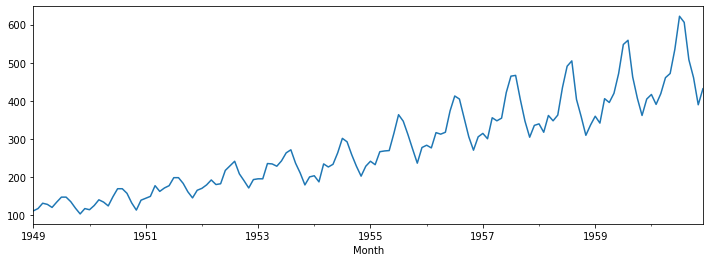

In [554]:
data = data.assign(Passengers_Mean_imputation = data['#Passengers'].fillna(data['#Passengers'].mean()))
data['Passengers_Mean_imputation'].plot(figsize=(12,4))

### b ) Linear Interpolation

<AxesSubplot:xlabel='Month'>

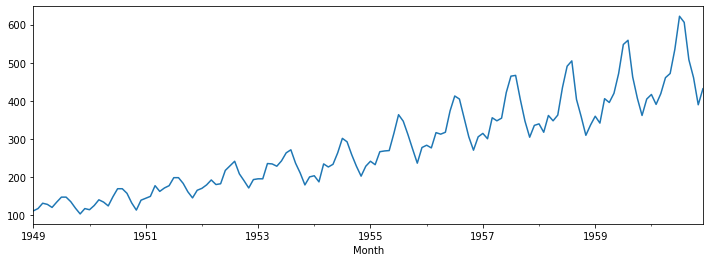

In [555]:
data = data.assign(Passengers_Linear_Interpolation = data['#Passengers'].interpolate(method='linear'))
data['Passengers_Linear_Interpolation'].plot(figsize=(12,4))

In [556]:
data.head()

,#Passengers,Passengers_Mean_imputation,Passengers_Linear_Interpolation
Month,,,
1949-01-01,112,112,112
1949-02-01,118,118,118
1949-03-01,132,132,132
1949-04-01,129,129,129
1949-05-01,121,121,121


Conclusion - Linear Interpolation technique of handling missing values would be good .

## 5 . Multivariate Analysis

### a ) Boxplots

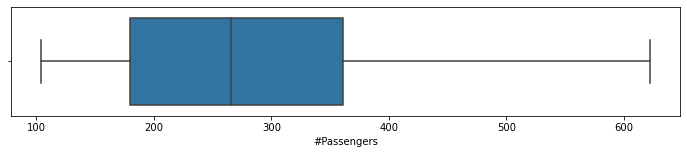

In [557]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['#Passengers'], whis=1.5)

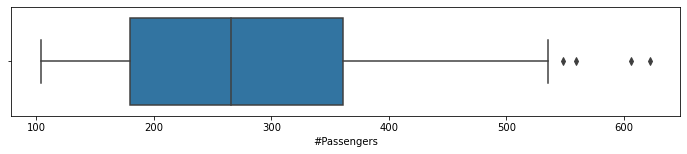

In [558]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['#Passengers'], whis=1)

Conclusion - We can take whis=1.5 IQR range , or else can miss datapoints required for timeseries analysis .

## 6 . Univariate Analysis

### a ) Histogram plot

<AxesSubplot:>

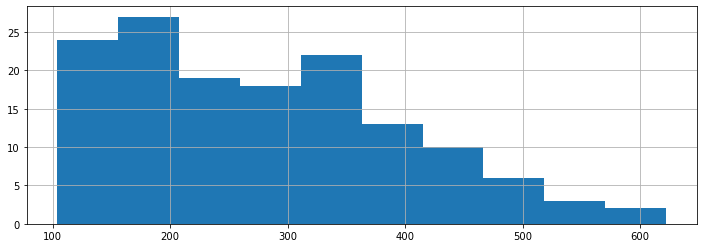

In [559]:
data['#Passengers'].hist(figsize=(12,4))

Conclusion - There are no outliers because data looks good . As the no. of passengers increases , the frequency decreases .

### b ) Density plot

Text(0.5, 0, '#Passenger')

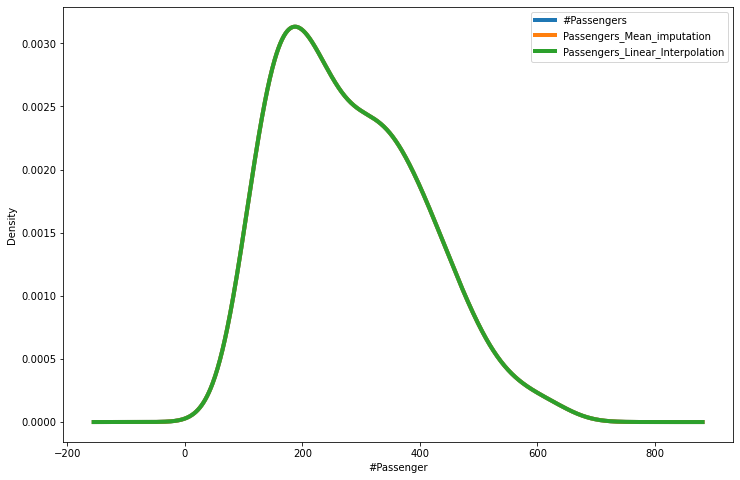

In [560]:
data.plot.density(figsize = (12, 8),linewidth = 4)
plt.xlabel("#Passenger")

# Decomposition of Dataset - Trends , Seasonality & Residuals

## 1 - Additive Seasonal Decomposition

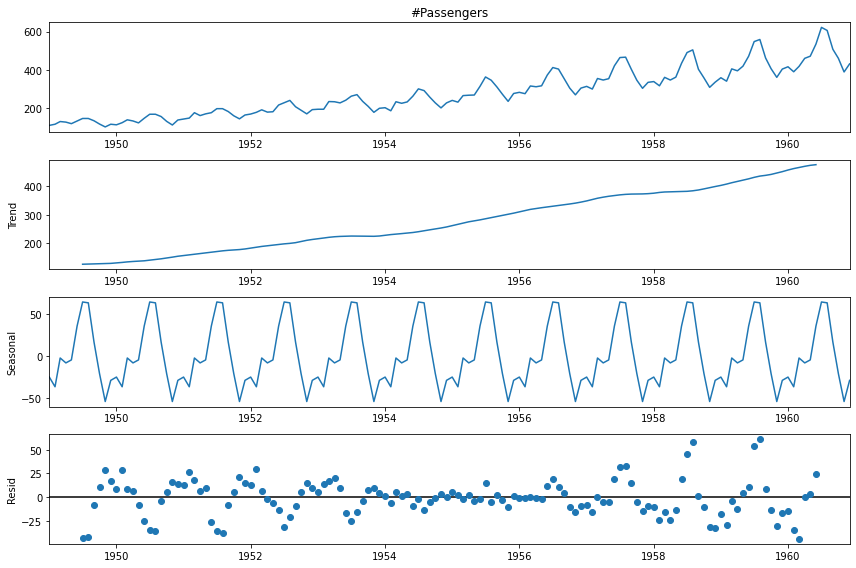

In [561]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data['#Passengers'], model='additive')
fig = decomposition.plot()
plt.show()

Conclusion :
    
    1 - Actual Data . Data - Trend + Seasonality + Residual
    2 - Trend - Increasing
    3 - Seasonal - Varies between -50 to +50 . No variations found
    4 - Residual - Noise patten in the data . This is the left over after decomposition of the data to Trend & Seasonality.
    

## 2 - Multiplicative Seasonal Decomposition

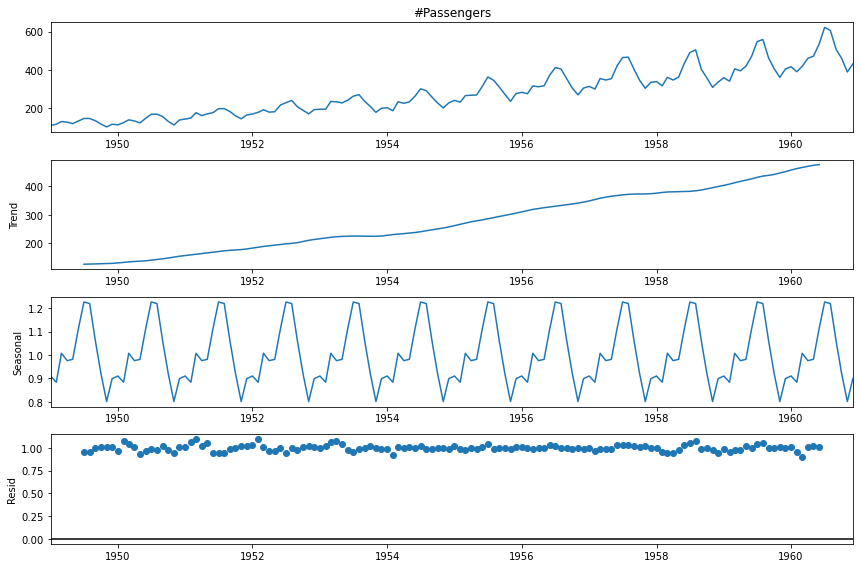

In [562]:
decomposition = sm.tsa.seasonal_decompose(data['#Passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

Conclusion : 

    - Seasonal value varies between 0.8 to 1.2

# Stationarity Vs Non-Stationarity - Check

Introducing a method to check Stationarity below . Moreover, have given different methods to check stationarity manually.

In [563]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
      
        movingAvg = timeseries.rolling(window=12).mean()
        movingStd = timeseries.rolling(window=12).std()
        
        org = plt.plot(timeseries, color = 'blue', label='Original Data')
        mean =plt.plot(movingAvg, color ='red', label= 'Rolling Mean')
        std = plt.plot(movingStd, color ='green', label = 'Rolling Std')
        plt.legend(loc = 'best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
        
        
        print("result of DCF Test")
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:2], index = ['Text Statistic', 'p-value'])
        
        for key, value in dftest[4].items():
            dfoutput['Critical value(%s)'%key] = value
        print(dfoutput)

## 1 . By Graph

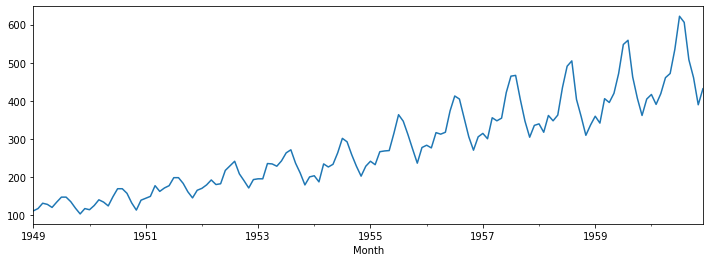

In [564]:
data['#Passengers'].plot(figsize=(12,4))
plt.show()

Conclusion :

    - Trend is not constant & Increasing 
    - Variance is not constant
    
    So this is non-stationary data .

## 2 - Rolling Statistics

In [565]:
data.drop(['Passengers_Mean_imputation', 'Passengers_Linear_Interpolation'], axis=1, inplace=True)

In [566]:
data.head(4)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129


In [567]:
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

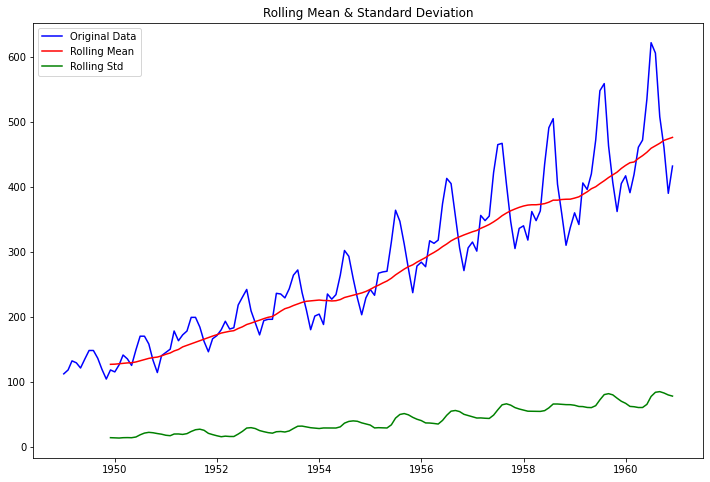

In [568]:
org = plt.plot(data, color = 'blue', label='Original Data')
mean =plt.plot(rolmean, color ='red', label= 'Rolling Mean')
std = plt.plot(rolstd, color ='green', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')

Conclusion :
    
    - Rolling mean and Rolling Std are not constant 
    - Trend involved
    
    So this is Non-Stationary Data

## 3 - Augmented Dicky-Fuller ( ADF ) Test

Theory is based on Null Hypothesis :

    - Null Hypothesis (H0): The series is not stationary ( p-val > 0.05 )
    - Alternate Hypothesis (H1): The series is stationary ( p-val <= 0.05 ) 

    

In [569]:
from statsmodels.tsa.stattools import adfuller

In [570]:
adf_test = adfuller(data['#Passengers'])
adf_test

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [571]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: 0.815369
p-value: 0.991880
Critical value @ 0.05: -2.88


Conclusion :
    
    - p-value (0.99) > critical value(0.05) 
    - Failed to Satisfy Null Hypothesis
    
    Data is Non-Stationary

# Converting Stationarity to Non-Stationarity 

## 1 - Box Cox Transformation or Logarithmic Scaling

In [572]:
from scipy.stats import boxcox

In [573]:
data_boxcox = pd.Series(boxcox(data['#Passengers'], lmbda=0), data.index)
data_boxcox.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
dtype: float64

In [574]:
data_logScale = np.log(data['#Passengers'])
data_logScale.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

Conclusion : Both Box Cox or Logarithmic Scaling way data conversion are almost same . 
             So take any one dataset , consider here Box Cox dataset .

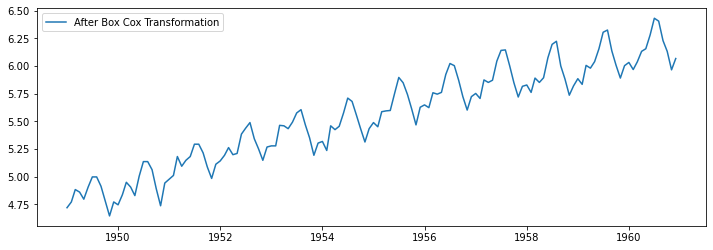

In [575]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

Conclusion :
    
    - Still we see upward Trend , so this data cann't be considered as Stationary .

## 2 - Make the Mean and Variance Constant

### a ) By Differencing

    - Differencing is performed by subtracting the previous observation from the current observation
    - Differencing removes trend and seasonality .

In [576]:
# You can make 1 , 2 ,3 shifts etc . Which ever meet stationarity take that shifts value .
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(1), index=data.index)

In [577]:
data_boxcox_diff.dropna(inplace=True)

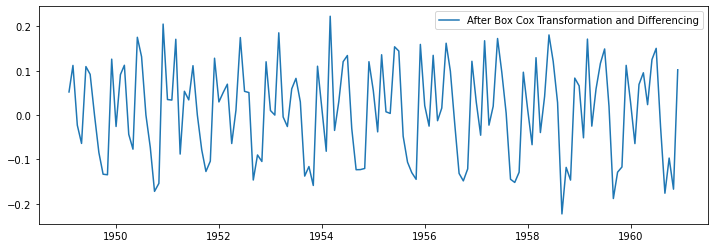

In [578]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

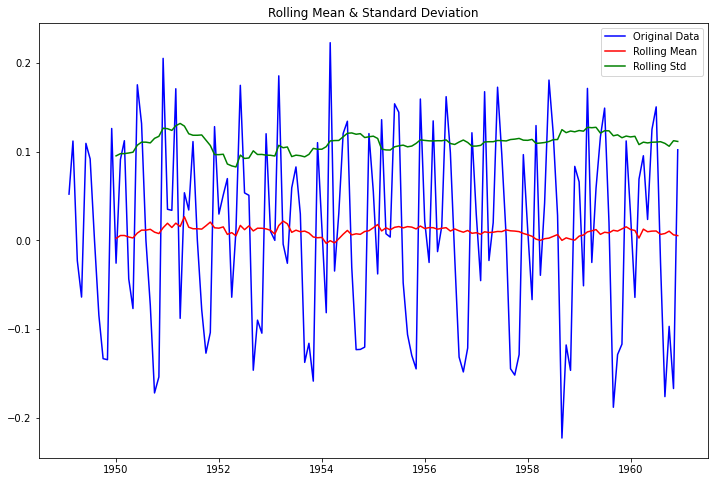

result of DCF Test
Text Statistic        -2.717131
p-value                0.071121
Critical value(1%)    -3.482501
Critical value(5%)    -2.884398
Critical value(10%)   -2.578960
dtype: float64


In [579]:
test_stationarity(data_boxcox_diff)

Conclusion :
    
    - No Trend seen
    - Constant Mean - ~0
    - Variance is also almost constant

## 3 - ADF Test

In [580]:
adf_test = adfuller(data_boxcox_diff)
adf_test

(-2.7171305983881595,
 0.07112054815085424,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

In [581]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -2.717131
p-value: 0.071121
Critical value @ 0.05: -2.88


Conclusion :
    
    - p-value(0.02) < critical value(0.05) . 
    - Reject Null Hypothesis , So Data is stationary 

# Autocorrelation

## 1 - Autocorrelation Function ( ACF )

    This function captures both direct and indirect relationship with it's lagged values

In [582]:
from statsmodels.graphics.tsaplots import plot_acf

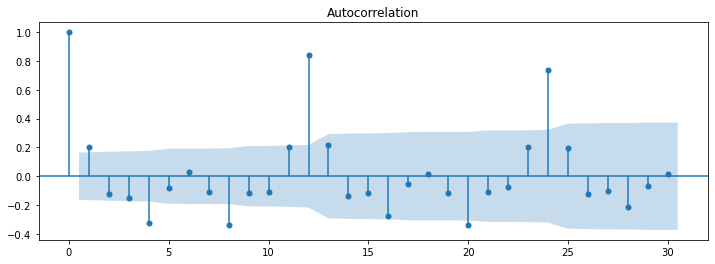

In [583]:
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

Conclusion :
    
    - correlation=1 at lag=0
    - ACF defines q value for p,d,q

## 2 - Partial Autocorrelation Function ( PACF )

    Captures only direct correlation

In [584]:
from statsmodels.graphics.tsaplots import plot_pacf

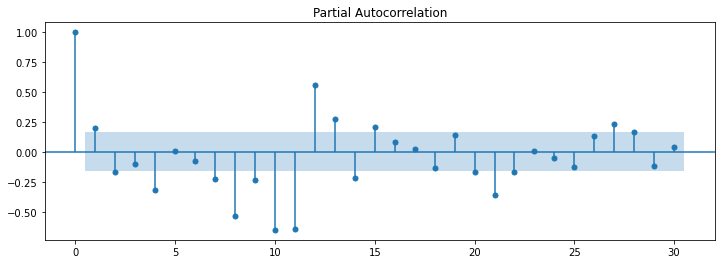

In [585]:
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

Conclusion : 
    
    - Little change in Correlation plot

# Building the Regression Model

## Data Preparation

In [586]:
train_len = 120
train = data[0:train_len]
# 1959 and 1960 data
test = data[train_len:]

In [587]:
# Splitting data_boxcox
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

In [588]:
# Splitting data_boxcox_diff

# Taking train_len-1 because we have deleted the forst observation
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## 1 - Auto Regressive Model (AR)

    order(p,d,q)
    
p = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation) P helps adjust the line that is being fitted to forecast the series.

d = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. d refers to the number of differencing transformations required by the time series to get stationary.

q = This variable denotes the lag of the error component, where error component is a part of the time series not explained by trend or seasonality.

In [589]:
from statsmodels.tsa.arima_model import ARIMA

In [590]:
# p = 1 . We are calculating only one lag time period 
# q = 0 . We have already made the time series as Stationary
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))

In [591]:
model_fit = model.fit()
model_fit.params

const      0.009477
ar.L1.y    0.182922
dtype: float64

constant ~0 . Because we saw in the Stationary time series that the mean was almost close to zero.

Coefficient = ~0.182

The AR model has only one lag or p=1. Hence, we can represent the model as AR(1)

In [592]:
y_hat_ar = data_boxcox_diff.copy()

### a ) Forecast

In [593]:
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

### b ) Recover original time series forecast

As we have converted the original time series to Stationary series by consecutively applying BoxCox transformation and Differencing. We have to transform the series back to the original one (step by step).

In [594]:
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()

In [595]:
# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])

In [596]:
# Now doing the reverse transformation 
# We have done Box Cox Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### c ) Plot

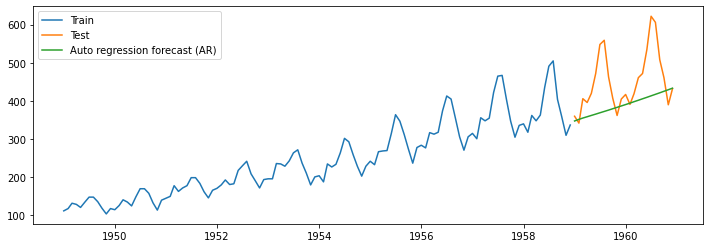

In [597]:
plt.figure(figsize=(12,4))
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

Conclusion :
    
    - No seasonality present .

### d ) Errors

In [598]:
#results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.DataFrame()
results

""


#### RMSE ( Root Mean Squared Error )

In [599]:
rmse = np.sqrt(mean_squared_error(test['#Passengers'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
rmse

93.32

#### MAPE (Mean Absolute Percentage Error)

In [600]:
mape = round(np.mean(np.abs((test['#Passengers'] - y_hat_ar['ar_forecast'][test.index.min():])/test['#Passengers'])*100),2)
mape

13.7

#### MAE (Mean Absolute Error)

In [601]:
mae = round(np.mean(np.abs((test['#Passengers'] - y_hat_ar['ar_forecast'][test.index.min():])/test['#Passengers'])),2)
mae

0.14

In [602]:
results = results.append({'Method':'Auto regressive (AR) method', 'RMSE':rmse, 'MAPE':mape , 'MAE':mae}, ignore_index=True)
results

,Method,RMSE,MAPE,MAE
0,Auto regressive (AR) method,93.32,13.7,0.14


## 2 - Moving Average Method (MA)

The Moving Average Model models the future forecasts using past forecast errors in a regression-like model. This model has a parameter ‘q’ called window size, over which linear combination of errors are calculated.

In [603]:
# q parameter = 1 MA(1) model
# If q = 3 , then it would be MA(3) model
# p = 0 and d = 0 As we are not considering these two parameters in this model.
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))

In [604]:
model_fit = model.fit()
model_fit.params

const      0.009529
ma.L1.y    0.258466
dtype: float64

### a ) Forecast

In [605]:
y_hat_ma = data_boxcox_diff.copy()

In [606]:
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

### b ) Recover original time series forecast

In [607]:
# Removing Differencing
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()

In [608]:
# Adding the first Ovservation
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])

In [609]:
# Removing the transformation
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### c ) Plot

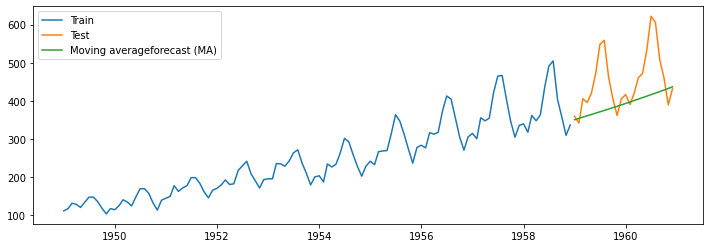

In [610]:
plt.figure(figsize=(12,4))
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving averageforecast (MA)')
plt.legend(loc='best')
plt.show()

Conclusion :
    
    - No seasonality present

### d ) Errors

In [611]:
rmse = np.sqrt(mean_squared_error(test['#Passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
rmse

91.42

In [612]:
mape = round(np.mean(np.abs((test['#Passengers'] - y_hat_ma['ma_forecast'][test.index.min():])/test['#Passengers'])*100),2)
mape

13.37

In [613]:
mae = round(np.mean(np.abs((test['#Passengers'] - y_hat_ma['ma_forecast'][test.index.min():])/test['#Passengers'])),2)
mae

0.13

In [614]:
results = results.append({'Method':'Moving average (MA) method', 'RMSE':rmse, 'MAPE':mape , 'MAE':mae}, ignore_index=True)
results

,Method,RMSE,MAPE,MAE
0,Auto regressive (AR) method,93.32,13.70,0.14
1,Moving average (MA) method,91.42,13.37,0.13


# 3 - Auto Regressive Moving Average (ARMA)

    ARMA(p,q) model.

In [615]:
# p=1 and q=1
model = ARIMA(train_data_boxcox_diff, order=(1,0,1))

In [616]:
model_fit = model.fit()
model_fit.params

const      0.009634
ar.L1.y   -0.581789
ma.L1.y    0.837575
dtype: float64

In [617]:
y_hat_arma = data_boxcox_diff.copy()

In [618]:
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [619]:
# Reverse the differencing
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()

In [620]:
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])

In [621]:
# Reverse the transformation
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

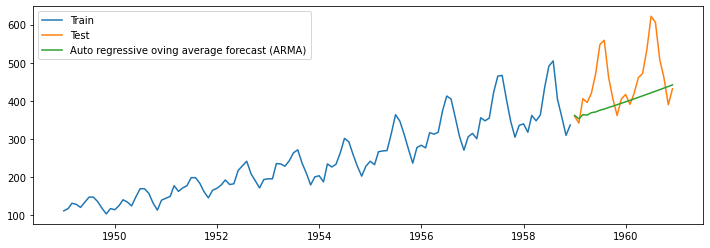

In [622]:
plt.figure(figsize=(12,4))
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='Auto regressive oving average forecast (ARMA)')
plt.legend(loc='best')
plt.show()

In [623]:
rmse = np.sqrt(mean_squared_error(test['#Passengers'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
rmse

88.58

In [624]:
mape = round(np.mean(np.abs((test['#Passengers'] - y_hat_arma['arma_forecast'][test.index.min():])/test['#Passengers'])*100),2)
mape

12.78

In [625]:
mae = round(np.mean(np.abs((test['#Passengers'] - y_hat_arma['arma_forecast'][test.index.min():])/test['#Passengers'])),2)
mae

0.13

In [626]:
results = results.append({'Method':'Auto regressive moving average (ARMA) method', 'RMSE':rmse, 'MAPE':mape ,'MAE':mae}, ignore_index=True)
results

,Method,RMSE,MAPE,MAE
0,Auto regressive (AR) method,93.32,13.70,0.14
1,Moving average (MA) method,91.42,13.37,0.13
2,Auto regressive moving average (ARMA) method,88.58,12.78,0.13


Conclusion :
    
    - Better than AR , MA
    - No Seasonality , only trends .

# 4 - Auto Regressive Integrated Moving Average (ARIMA)

In [657]:
# Passing only the transformed boxcox data. Because ARIMA automatically performing the differencing.
model = ARIMA(train_data_boxcox, order=(1,1,1))

In [658]:
model_fit = model.fit()
model_fit.params

const        0.009634
ar.L1.D.y   -0.581789
ma.L1.D.y    0.837575
dtype: float64

In [659]:
y_hat_arima = data_boxcox_diff.copy()

In [660]:
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [661]:
# Reverse the differencing
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()

In [662]:
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])

In [663]:
# Reverse the transformation
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

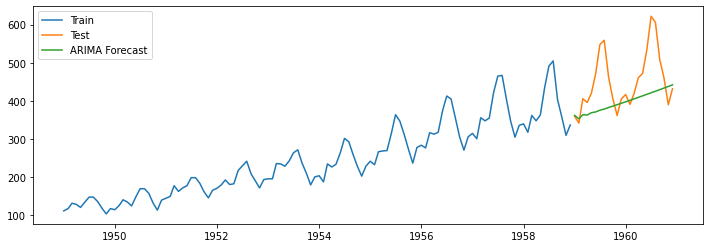

In [664]:
plt.figure(figsize=(12,4))
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [665]:
rmse = np.sqrt(mean_squared_error(test['#Passengers'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
rmse

88.58

In [666]:
mape = round(np.mean(np.abs((test['#Passengers'] - y_hat_arima['arima_forecast'][test.index.min():])/test['#Passengers'])*100),2)
mape

12.78

In [667]:
mae = round(np.mean(np.abs((test['#Passengers'] - y_hat_arima['arima_forecast'][test.index.min():])/test['#Passengers'])),2)
mae

0.13

In [668]:
results = results.append({'Method':'ARIMA method', 'RMSE':rmse, 'MAPE':mape,'MAE':mae}, ignore_index=True)
results

,Method,RMSE,MAPE,MAE
0,Auto regressive (AR) method,93.32,13.70,0.14
1,Moving average (MA) method,91.42,13.37,0.13
2,Auto regressive moving average (ARMA) method,88.58,12.78,0.13
3,ARIMA method,88.58,12.78,0.13
4,SARIMA method,39.84,7.79,0.08
5,ARIMA method,88.58,12.78,0.13


Conclusion : 
    
    - No difference between ARIMA and ARMA methods. Because ARIMA is automatic differencing and ARMA is manual.

# 5 - Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [639]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [640]:
# We are only passing the Box Cox because the ARIMAX will perform the differencing internally
# m=12 . Because the seasonality is monthly.
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))

In [641]:
model_fit = model.fit()
model_fit.params

ar.L1       0.206355
ma.L1      -0.541972
ar.S.L12   -0.067271
ma.S.L12   -0.497609
sigma2      0.001393
dtype: float64

    ar.L1  = Coefficients of AR for the trend (p)
    ma.L1  = Coeff of MA for the trend (q)
    ar.S.L12  = Coeff for AR for the seasonality (P)
    ma.S.L12  = Coeff of MA for the seasonality (Q)
    sigma2  = Intercept

In [642]:
y_hat_sarima = data_boxcox_diff.copy()

In [643]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

##### Reverse original time series forecast

Note that ARIMAM automatically takes care of the reversing of Differencing (takes care the Integration part automatically). So, we don't need to perform the cumsum here. We only have to do the reverse of the log boc cox transformation.

In ARIMA, we had to perform the cumsum manually.

In [644]:
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

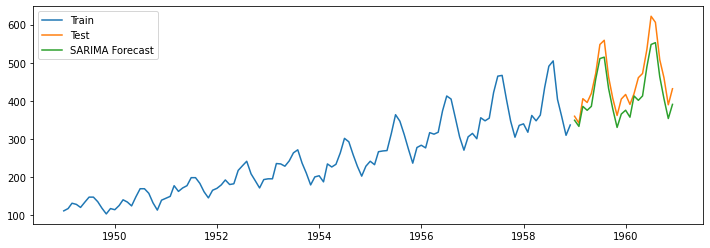

In [645]:
plt.figure(figsize=(12,4))
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [646]:
rmse = np.sqrt(mean_squared_error(test['#Passengers'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
rmse

39.84

In [647]:
mape = round(np.mean(np.abs((test['#Passengers'] - y_hat_sarima['sarima_forecast'][test.index.min():])/test['#Passengers'])*100),2)
mape

7.79

In [648]:
mae = round(np.mean(np.abs((test['#Passengers'] - y_hat_sarima['sarima_forecast'][test.index.min():])/test['#Passengers'])),2)
mae

0.08

In [649]:
results = results.append({'Method':'SARIMA method', 'RMSE':rmse, 'MAPE':mape, 'MAE':mae}, ignore_index=True)
results

,Method,RMSE,MAPE,MAE
0,Auto regressive (AR) method,93.32,13.70,0.14
1,Moving average (MA) method,91.42,13.37,0.13
2,Auto regressive moving average (ARMA) method,88.58,12.78,0.13
3,ARIMA method,88.58,12.78,0.13
4,SARIMA method,39.84,7.79,0.08


Conclusion :
    
    - SARIMA method has done reasonably well as it captures seasonality.

##### Best model with lower RMSE , MAPE and MAE value should be taken to consideration . SARIMA model is good fit here .

# Test

In [670]:
from statsmodels.graphics.tsaplots import plot_predict

In [671]:
x=model_fit.forecast(steps= len(test))[0]

In [672]:
x

array([5.88982228, 5.86448756, 5.89446593, 5.89226373, 5.90878384,
       5.91441151, 5.92637629, 5.9346542 , 5.94507709, 5.95425206,
       5.96415306, 5.97363166, 5.98335601, 5.99293738, 6.00260193,
       6.01221809, 6.02186241, 6.03149035, 6.04112781, 6.05075973,
       6.06039488, 6.07002815, 6.07966251, 6.08929624])

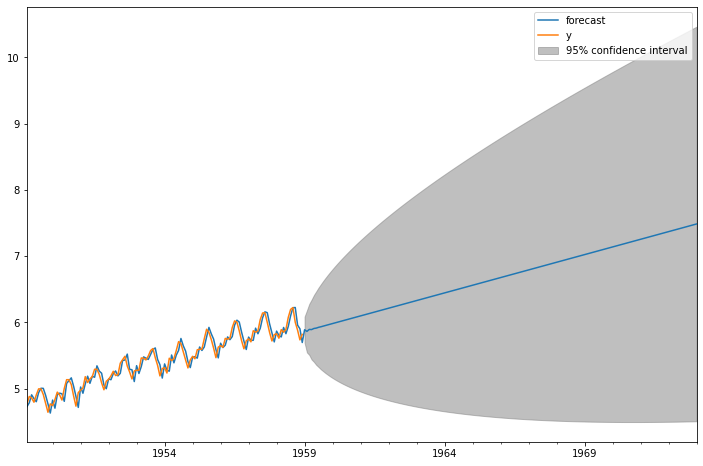

In [673]:
model_fit.plot_predict(1,288)
x= model_fit.forecast(steps=144)

AttributeError: 'DataFrame' object has no attribute 'ix'

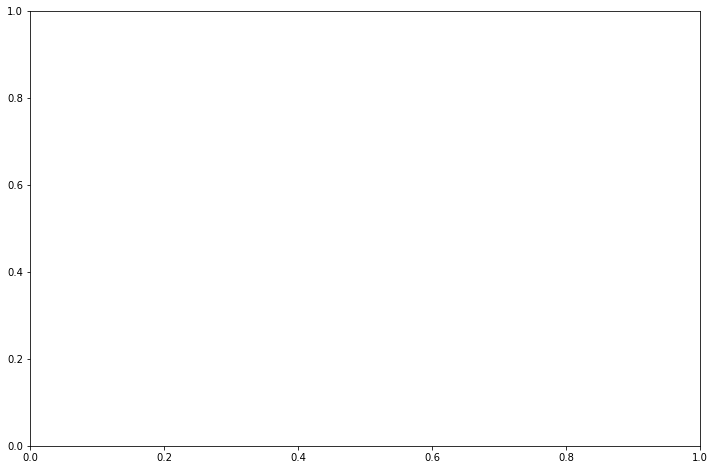

In [675]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.ix['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1960', '1970', dynamic=True, ax=ax, plot_insample=False)